In [1]:
#########################################################
####
#### Tutorial: RNA Design with Infrared (for Developers)
####
#########################################################

###############################################
## Start with simple sampling of RNA sequences

# -- _the_ main module of Infrared
import infrared as ir

In [2]:
# -- specify a constraint network and it's tree decomp

# our first CN is _very_ simple: 20 variables (=sequence positions), no dependencies
cn = ir.ConstraintNetwork(varnum=20, domains=4)
# produce cluster tree for the CN, using default tree decomposition
ct = ir.ClusterTree(cn)

tree width = 0
bags = [[1], [19], [6], [3], [16], [14], [9], [2], [5], [13], [18], [8], [4], [7], [11], [0], [17], [10], [12], [15]]
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19)]


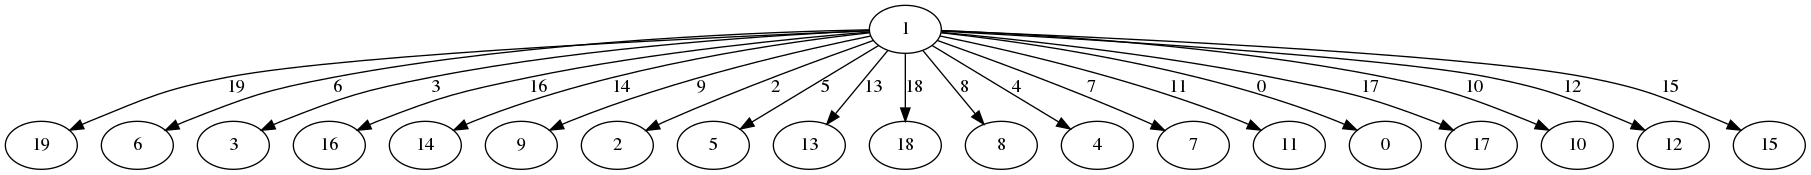

In [3]:
def show_td_info(ct,width):
    td = ct.get_td()
    print("tree width =", td.treewidth())
    print("bags =", td.get_bags())
    print("edges =", td.get_edges())
    
    tmpfile="tmp_out"
    td.writeTD(open(tmpfile+".dot","w"))
    import treedecomp
    treedecomp.dotfile_to_png(tmpfile+".dot")
    from IPython.display import Image
    return Image(filename=(tmpfile+".png"),width=width)
    
show_td_info(ct,500)

In [4]:
# -- evaluate the cluster tree
#   -- in this simple case, this will count the structures
count = ct.evaluate()
print("# =",int(count))
# btw, of course, 'count' is the number of all possible seqs 4**20

# = 1099511627776


In [5]:
# -- generate 10 samples
samples = [ct.sample().values() for i in range(10)]

In [6]:
samples

[[3, 1, 3, 0, 0, 0, 3, 2, 2, 0, 2, 2, 1, 0, 1, 2, 0, 3, 0, 0],
 [2, 2, 3, 3, 1, 1, 0, 3, 3, 1, 1, 1, 2, 3, 1, 3, 3, 2, 2, 3],
 [1, 2, 3, 3, 1, 3, 2, 0, 0, 1, 2, 0, 0, 3, 2, 0, 1, 3, 0, 2],
 [2, 2, 3, 3, 2, 1, 1, 2, 1, 3, 3, 1, 1, 0, 1, 0, 0, 3, 2, 2],
 [3, 3, 3, 1, 2, 3, 2, 3, 3, 0, 3, 1, 2, 0, 3, 2, 2, 1, 1, 1],
 [1, 3, 3, 1, 0, 1, 2, 1, 3, 3, 0, 2, 1, 0, 3, 1, 2, 0, 0, 1],
 [2, 1, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3],
 [0, 2, 0, 0, 1, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 2, 2, 0],
 [0, 3, 1, 3, 3, 2, 1, 1, 3, 2, 3, 0, 0, 2, 0, 0, 2, 2, 1, 3],
 [2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1, 3, 0, 0, 3, 0]]

In [7]:
# -- and show them (pretty)
from infrared import rna
[rna.values_to_sequence(s) for s in samples]

['UCUAAAUGGAGGCACGAUAA',
 'GGUUCCAUUCCCGUCUUGGU',
 'CGUUCUGAACGAAUGACUAG',
 'GGUUGCCGCUUCCACAAUGG',
 'UUUCGUGUUAUCGAUGGCCC',
 'CUUCACGCUUAGCAUCGAAC',
 'GCGGAAGUGAAAGUAAUAAU',
 'AGAACAUAUUAAAUAUUGGA',
 'AUCUUGCCUGUAAGAAGGCU',
 'GGUUUUUUUGGUGGCUAAUA']

In [8]:
##################################################
## add constraints from an RNA secondary structure
structure = "((((...))))(((...)))"
bps = rna.parseRNAStructureBps(structure)

In [9]:
bps

[(0, 10), (1, 9), (2, 8), (3, 7), (11, 19), (12, 18), (13, 17)]

In [10]:
complementary_nucleotides = ["AU","CG","GC","GU","UA","UG"]
# -- define complementarity constraints
ir.def_constraint_class( 
    'ComplConstraint',
    lambda i,j: [i,j],
    lambda x,y: rna.values_to_sequence([x,y]) 
                  in complementary_nucleotides
)    
    
## btw, there is already a pre-defined constraint rna.ComplConstraint,
## which we could have used as well

cons = [ ComplConstraint( i = i, j = j ) for (i,j) in bps ]
deps = [ x.vars() for x in cons ]

cons, deps

([<infrared.infrared.ComplConstraint at 0x7f2234dc1b30>,
 [[0, 10], [1, 9], [2, 8], [3, 7], [11, 19], [12, 18], [13, 17]])

In [49]:
# -- reinitialize constraint network, rebuild tree decomp and cluster tree
#complementary_nucleotides = ["AU"]

seqlen = len(structure) # --> number of positions / variables in the CN
cn = ir.ConstraintNetwork(varnum=seqlen, domains=4, constraints = cons)
ct = ir.ClusterTree(cn)

show_td_info(ct,500)((((...))))(((...)))

tree width = 1
bags = [[1, 9], [10], [10, 0], [3], [3, 7], [17], [13, 17], [18], [18, 12], [2], [8, 2], [11], [19, 11], [6], [5], [16], [4], [15], [14]]
edges = [(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (0, 11), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (1, 2), (3, 4), (5, 6), (7, 8), (9, 10), (11, 12)]


TypeError: 'Image' object is not callable

In [50]:
# generate samples (with complementarity constraints)
def spit_them_samples_out(ct,num, seqlen=None):
    samples = [ ct.sample().values() for i in range(num) ]
    if seqlen is not None:
        return [ rna.values_to_sequence(s[:seqlen])+''.join(map(str,s[seqlen:]))  for s in samples ]
    else:
        return [ rna.values_to_sequence(s)  for s in samples ]

count = ct.evaluate()
print("# =",int(count))
# btw, count == 6**7 * 4**6, by simple combinatorics

print("  "+structure)
spit_them_samples_out(ct,10)

# = 1146617856
  ((((...))))(((...)))


['UUACCCGGUGGUUGUAACAA',
 'ACCGCAAUGGUUCACACUGG',
 'AUGCCAGGCGUGGUACCGUC',
 'UGGGGUGCCUACAGGGUCUG',
 'AAGUACGACUUAGUCGAGCU',
 'UUGUUAAGCAAGGGGUCUUU',
 'GAUGAAGUGUUUUCUUUGGA',
 'GACGGUCUGUCUAGCCCUUG',
 'AGGUCGUGCUUGACCUUGUC',
 'AUGGUUGUUGUGGAGGGUCC']

In [51]:
##########################
## Control the GC content

# -- define function for GC Control
ir.def_function_class(
    'GCControl',
    lambda i: [i],
    lambda x: rna.value_to_nucleotide( x ) in "GC"
)

## btw, there is predefined rna.GCControl

In [52]:
## -- setup functions
gc_weight = 1 ## <- try different weights: 0.1, 10, ...

gc_funs = [ GCControl( i = i, weight = gc_weight )
              for i in range( seqlen ) ]

# -- reinitialize constraint network, rebuild tree decomp and cluster tree
cn = ir.ConstraintNetwork( varnum = seqlen, domains = 4,
                           constraints = cons,
                           functions = gc_funs )
ct = ir.ClusterTree( cn )

spit_them_samples_out( ct, 10 )

['CGGGGAGCUUGUCUUGUAGG',
 'GUGUAAAAUACCCUCCUAGG',
 'GCUACAGUGGUCUGCGCUGG',
 'CUUUCCCAGGGAGGUGCCCU',
 'UGUAGUGUACGUAUAGUGUG',
 'CGCCUUCGGCGCGCGAAGCG',
 'UACGUAGUGUAUGCGAAGCG',
 'CAUGAGACGUGAUGAGGUGU',
 'GAUCACUGGUUGGACUAUCU',
 'GAAUCUCAUUUGAUGUCGUU']

In [53]:
##########################
## Control the BP energy

rna.set_bpenergy_table() # set bp energies to magic numbers

bpe_weight = 2 ## <- try different weights: 0.1, 10, ...
bpe_funs = [ rna.BPEnergy( bpe_weight, i=i, j=j, is_terminal=False ) for (i,j) in bps ] 

cn = ir.ConstraintNetwork(varnum=seqlen, domains=4,
                          constraints=cons,
                          functions=bpe_funs + gc_funs)
ct = ir.ClusterTree(cn)


print("  "+structure)
spit_them_samples_out(ct, 10)

  ((((...))))(((...)))


['GGGAGAUUCUCGUGCCACGC',
 'GCACUGCGUGCCCGAUAUGG',
 'CGCGCCUCGCGGCGUUAUGU',
 'ACGGCUUUUGUUCGGAUCGA',
 'UGCGUGGCGCAGCCACUGGC',
 'UCGGCUCCUGAGGCUACGUC',
 'CCGCAUUGCGGGCCCGGGGC',
 'GGUGCGGCGCCUGCUUGGUA',
 'CGUCCUGGGUGGGCGCAGUC',
 'GACCCCCGGUCCCCGGAGGG']

In [54]:
### as example of additional hard constraints: avoid GG dinucleotides

ir.def_constraint_class('AvoidGGConstraint',
                         lambda i: [i, i+1],
                         lambda x,y: rna.values_to_sequence([x,y]) != "GG")

gg_cons = [ AvoidGGConstraint(i=i) for i in range(seqlen-1) ]

In [55]:
cn = ir.ConstraintNetwork(varnum=seqlen, domains=4,
                          constraints = cons + gg_cons,
                          functions = bpe_funs + gc_funs)
ct = ir.ClusterTree(cn)

print("  "+structure)
spit_them_samples_out(ct, 10)

  ((((...))))(((...)))


['GUGCAGCGCACGUCAUAGAC',
 'CGUACACUGCGUUCUGCGAG',
 'GAGCAUUGUUUAUAAUAUGU',
 'ACGCAGAGUGUGUCCAAGAC',
 'UUUUCUGAAAGCAGAUUCUG',
 'GCGCGUCGCGCUGCAUUGUA',
 'CGUGCCUUGUGUUACCCUGA',
 'UGCAUUGUGCGCACACUGUG',
 'UAGUUGUGUUGCUGUGCCAG',
 'UCUCAACGAGAAGCCAAGCU']

In [64]:
### Insert (AAA or UAA) and (CCC) in samples

variables = [4]*seqlen
states1, dfa_constraints1 = ir.words_to_accept(['AAA','UAA'], seqlen-1, seqlen, start=0)
states2, dfa_constraints2 = ir.words_to_accept(['CCC'], seqlen-1, seqlen+len(states1), start=0)

cn = ir.ConstraintNetwork(domains=variables + states1 + states2,
                          constraints = cons + gg_cons + dfa_constraints1 + dfa_constraints2,
                          functions = bpe_funs + gc_funs)
ct = ir.ClusterTree(cn)

print("  "+structure)
spit_them_samples_out(ct, 10, seqlen)

  ((((...))))(((...)))


['UGCGCAACGCAAAUCCCAUU010000120001233333333000303003030000312222',
 'UCUUUGAAAGAACUCCCAGU010111012333333333333003000000000030312222',
 'ACGUAAUGCGUCGCCCAGCG010012333333333333333003000000300303122222',
 'GAGACCCUCUUCAUAAGAUG001010001011011233333000003122222222222222',
 'AUUGAAACGAUAUGCCCCGU011101233333333333333000000003000000312222',
 'UUUUGUGAAAACUUCCCGAG011110101233333333333000000000000300312222',
 'GUAUUUAAUGCCAGCCCCUG001211123333333333333000000000003100312222',
 'AGUGUAAUACUGCUCCCAGC010101233333333333333000000000030030312222',
 'GCUUGUAAAGUGUGCCCUGU000110123333333333333003000000000000312222',
 'GACGUCCCGUCCGUAAAACG001001000010001233333000300312222222222222']

In [20]:
dfa = ir.automaton.words_to_dfa(['AAAAAA'])
print(dfa.initial_state, dfa.final_states)
print(dfa.transitions)

q2 {'q3'}
{'q2': {'1': 'q2', '3': 'q2', '0': 'q1', '2': 'q2'}, 'q1': {'1': 'q2', '3': 'q2', '0': 'q5', '2': 'q2'}, 'q5': {'1': 'q2', '3': 'q2', '0': 'q0', '2': 'q2'}, 'q0': {'1': 'q2', '3': 'q2', '0': 'q6', '2': 'q2'}, 'q6': {'1': 'q2', '3': 'q2', '0': 'q4', '2': 'q2'}, 'q4': {'1': 'q2', '3': 'q2', '0': 'q3', '2': 'q2'}, 'q3': {'1': 'q3', '3': 'q3', '0': 'q3', '2': 'q3'}}


In [20]:
print(states)

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [19]:
#### now, automatize the targeting of feature values
##

# -- we start by defining the features

class GCFeature(ir.Feature):
    def __init__(self, weight, target, tolerance):
        super().__init__( "GC", weight, target, tolerance)
    def eval(self, sample):
        return rna.GC_content(sample) * 100

class EnergyFeature(ir.Feature):
    def __init__(self, structure, weight, target, tolerance):
        super().__init__( "E", weight, target, tolerance )
        self.structure = structure
    def eval(self, sample):
        import RNA
        return RNA.energy_of_struct(sample, self.structure)

In [19]:
# -- next, instantiate the sampler

class MySampler(ir.MultiDimensionalBoltzmannSampler):
    def __init__( self, features ):
        super().__init__(features)
        
    def gen_constraint_network(self, features):
        bpe_weight = features["E"].weight
        bpe_funs = [ rna.BPEnergy( i = i , j = j,
                                   is_terminal = False,
                                   weight = bpe_weight ) 
                     for ( i, j ) in bps ] 
        gc_weight = features["GC"].weight
        gc_funs = [ GCControl( i = i, weight = gc_weight )
                    for i in range(seqlen) ]
        return ir.ConstraintNetwork( varnum = seqlen, domains = 4,
                                     constraints = cons,
                                     functions = bpe_funs + gc_funs )
    
    def sample(self):
        return rna.values_to_sequence(super().sample().values())
                  
# -- produce the feature objects 
# !!! here we define the targeted feature values and tolerances !!!
features = { "E": EnergyFeature(structure,1,-2,1),
             "GC": GCFeature(1,70,15) }

# -- from this, construct the sampler
sampler = MySampler(features)

In [23]:
# -- and sample away
count=0
for seq in sampler.targeted_samples():
    import RNA # for energy evaluation
    print("{} {:.2f} {:.2f}".format(seq, RNA.energy_of_struct(seq,structure), 100*rna.GC_content(seq)))
    count+=1
    if count >= 10:
        break

ImportError: cannot import name '_RNA' from partially initialized module 'RNA' (most likely due to a circular import) (/usr/local/lib/python3.6/site-packages/RNA/__init__.py)